In [1]:
#Iris FLower Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df=pd.read_csv(r"D:\Oasis Infobyte Internship Tasks datasets\Iris.csv")
if 'Id' in df.columns:
    df=df.drop(columns=['Id'])

In [5]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


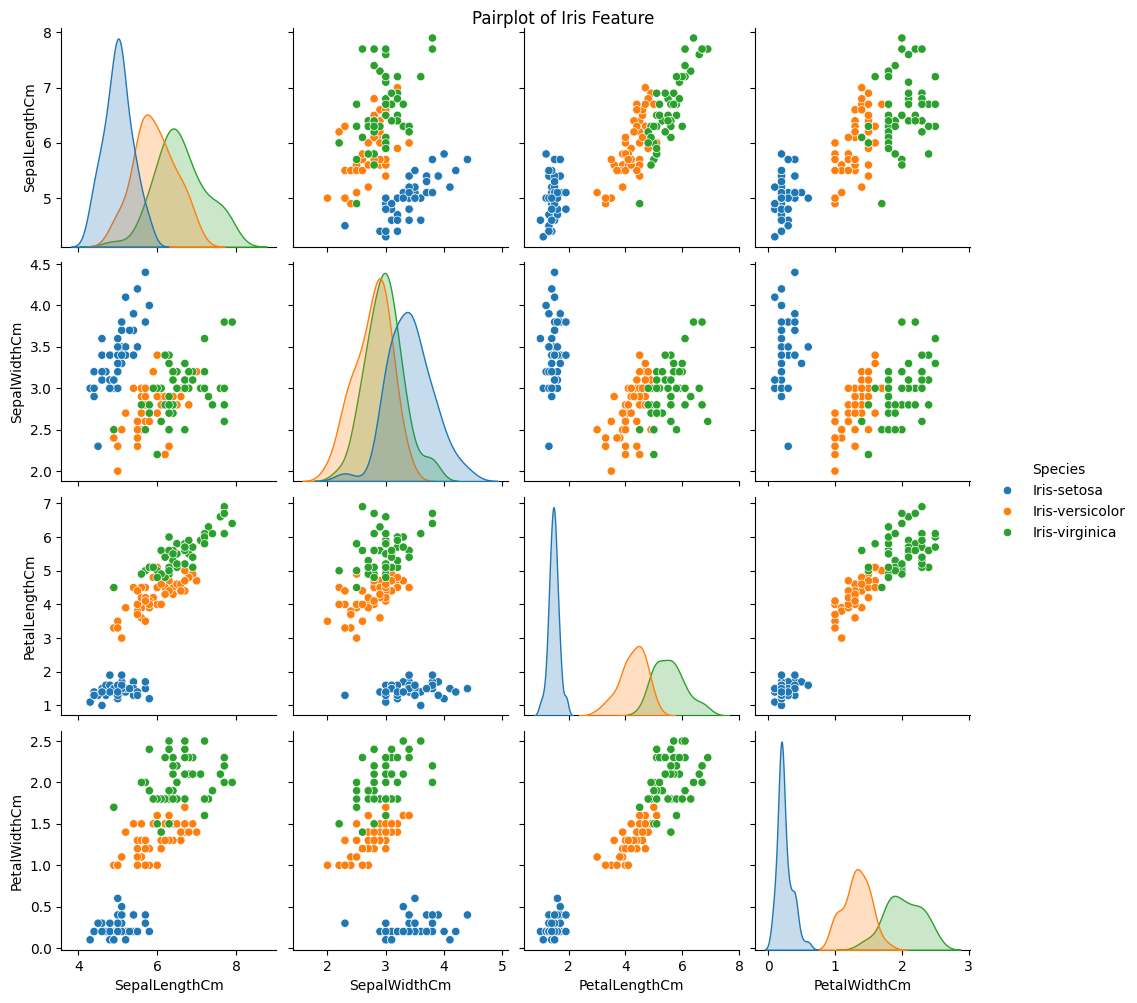

In [6]:
sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot of Iris Feature", y=1)
plt.show()

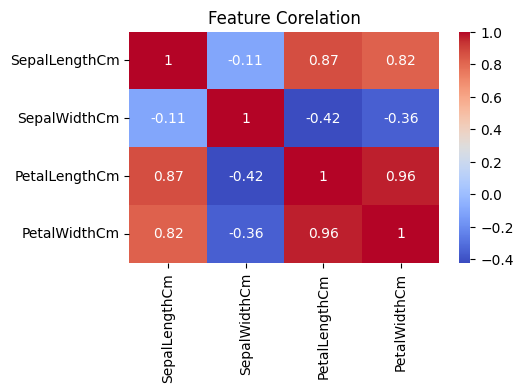

In [7]:
plt.figure(figsize=(5,3))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Corelation")
plt.show()

In [8]:
X=df.drop('Species', axis=1)
y=df['Species']
le=LabelEncoder()
y_encoded=le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [9]:
print("ACCURACY:-", accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:-\n", confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:-\n", classification_report(y_test, y_pred, target_names=le.classes_))

ACCURACY:- 0.9333333333333333

CONFUSION MATRIX:-
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

CLASSIFICATION REPORT:-
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [10]:
sample_data=[[5.1, 3.5, 1.4, 0.2]]
sample_df=pd.DataFrame(sample_data, columns=X.columns)
sample_scaled=scaler.transform(sample_df)

In [11]:
y_pred=model.predict(sample_scaled)
predicted_class=le.inverse_transform(y_pred)[0]

In [12]:
print(f"Predicted class for sample {sample_scaled}:{predicted_class}")

Predicted class for sample [[-0.88566202  1.02709468 -1.34703555 -1.32016847]]:Iris-setosa
